In [34]:
import scipy.io

In [35]:
def load_data(file_name):
    return scipy.io.loadmat(file_name)

### Load Data

In [36]:
ex1 = load_data('example1kinect.mat')
ex2 = load_data('example2kinect.mat')

### EDA

In [37]:
ex1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Apr 26 16:26:46 2017',
 '__version__': '1.0',
 '__globals__': [],
 'amplitudes1': array([[    0,  1711,  2618, ..., 11774, 17148,     0],
        [    0,  3487,  3862, ...,  6204,  6588,     0],
        [    0,  2883,  1739, ...,  6702,  7729,     0],
        ...,
        [    0,  9210,  7708, ...,  4909,  4566,     0],
        [    0, 17712, 13374, ...,  9831,  7632,     0],
        [    0, 33642, 16712, ...,  6590,  7424,     0]], dtype=uint16),
 'distances1': array([[0.        , 0.        , 0.        , ..., 2.08750653, 9.91966915,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 2.21158051, 0.        ,
         0.        ],
        ...,
        [0.        , 0.81849653, 0.8396064 , ..., 0.86473584, 0.88194507,
         0.        ],
        [0.        , 0.87757653, 0.8493191 , ..., 0.84469038, 0.

In [38]:
type(ex1)

dict

In [39]:
ex1['amplitudes1']

array([[    0,  1711,  2618, ..., 11774, 17148,     0],
       [    0,  3487,  3862, ...,  6204,  6588,     0],
       [    0,  2883,  1739, ...,  6702,  7729,     0],
       ...,
       [    0,  9210,  7708, ...,  4909,  4566,     0],
       [    0, 17712, 13374, ...,  9831,  7632,     0],
       [    0, 33642, 16712, ...,  6590,  7424,     0]], dtype=uint16)

In [40]:
ex1['amplitudes1'].shape

(424, 512)

In [41]:
ex1['distances1']

array([[0.        , 0.        , 0.        , ..., 2.08750653, 9.91966915,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 2.21158051, 0.        ,
        0.        ],
       ...,
       [0.        , 0.81849653, 0.8396064 , ..., 0.86473584, 0.88194507,
        0.        ],
       [0.        , 0.87757653, 0.8493191 , ..., 0.84469038, 0.85190231,
        0.        ],
       [0.        , 0.92695111, 0.        , ..., 0.88022852, 0.84321123,
        0.        ]])

In [42]:
ex1['distances1'].shape

(424, 512)

In [43]:
ex1['cloud1'].shape

(424, 512, 3)

In [44]:
ex1['cloud1']

array([[[-0.        , -0.        ,  0.        ],
        [-0.        , -0.        ,  0.        ],
        [-0.        , -0.        ,  0.        ],
        ...,
        [ 1.13569915, -0.88586158,  1.51099968],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        , -0.        ,  0.        ]],

       [[-0.        , -0.        ,  0.        ],
        [-0.        , -0.        ,  0.        ],
        [-0.        , -0.        ,  0.        ],
        ...,
        [ 0.        , -0.        ,  0.        ],
        [ 0.        , -0.        ,  0.        ],
        [ 0.        , -0.        ,  0.        ]],

       [[-0.        , -0.        ,  0.        ],
        [-0.        , -0.        ,  0.        ],
        [-0.        , -0.        ,  0.        ],
        ...,
        [ 1.20425951, -0.9299584 ,  1.60499978],
        [ 0.        , -0.        ,  0.        ],
        [ 0.        , -0.        ,  0.        ]],

       ...,

       [[-0.        ,  0.        ,  0.        ],
        [-0

### Visualizations

In [45]:
import matplotlib
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [46]:
def visualize_amplitude(example, num):
    A = example['amplitudes'+str(num)]
    D = example['amplitudes'+str(num)]
    PC = example['amplitudes'+str(num)]
    plt.figure(figsize=(6, 4))
    plt.imshow(A, cmap='gray')
    plt.colorbar()
    plt.title('Amplitude Image')

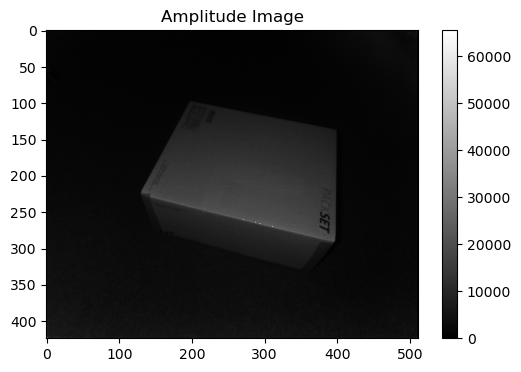

In [47]:
visualize_amplitude(ex1, 1)

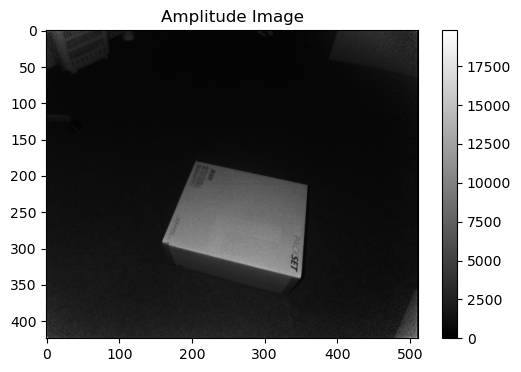

In [48]:
visualize_amplitude(ex2,2)

### Visualizing 3d point cloud

In [49]:
PC = ex1['cloud1']
import plotly.graph_objects as go

x = PC[:, :, 0].flatten() 
y = PC[:, :, 1].flatten()  
z = PC[:, :, 2].flatten() 

# # Create a 3D scatter plot using Plotly
# fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers',
#                                    marker=dict(size=0.5, opacity=0.5))])

# # Set axis labels and title
# fig.update_layout(scene=dict(xaxis_title='X',
#                              yaxis_title='Y',
#                              zaxis_title='Z'),
#                   title_text='3D Point Cloud')

# fig.show()

In [50]:
x,y,z

(array([-0.        , -0.        , -0.        , ...,  0.47419965,
         0.45579621,  0.        ]),
 array([-0.        , -0.        , -0.        , ...,  0.41139904,
         0.3938987 ,  0.        ]),
 array([0.        , 0.        , 0.        , ..., 0.61699903, 0.58999896,
        0.        ]))

In [51]:
points = np.column_stack((x, y, z))

In [52]:
points.shape

(217088, 3)

In [53]:
from tqdm.auto import tqdm

### RANSAC (to find dominant plane)

In [54]:
import numpy as np

def fit_plane(p1, p2, p3):
    """Given three 3D points, compute the plane equation ax + by + cz + d = 0."""
    normal = np.cross(p2 - p1, p3 - p1)
    a, b, c = normal
    d = -np.dot(normal, p1)
    return a, b, c, d

def distance_to_plane(plane, point):
    """Compute the distance from a point to a plane."""
    a, b, c, d = plane
    x, y, z = point
    return abs(a*x + b*y + c*z + d) / np.sqrt(a**2 + b**2 + c**2)

def ransac_plane_fit(data, iterations, threshold):
    best_plane = None
    best_inliers_count = 0
    best_inlier_indices = []
    
    for i in tqdm(range(0,iterations)):
        sample_indices = np.random.choice(data.shape[0], 3, replace=False)
        sample = data[sample_indices]
        
        # Fit a plane to the sample
        plane = fit_plane(*sample)
        
        # Count inliers and store their indices
        distances = [distance_to_plane(plane, p) for p in data]
        inlier_indices = [i for i, d in enumerate(distances) if d < threshold]
        
        if len(inlier_indices) > best_inliers_count:
            best_inliers_count = len(inlier_indices)
            best_plane = plane
            best_inlier_indices = inlier_indices
            
    # Determine inliers and outliers based on best_plane
    inliers = data[best_inlier_indices]
    outlier_indices = set(range(data.shape[0])) - set(best_inlier_indices)
    outliers = data[list(outlier_indices)]
            
    return best_plane, inliers, outliers


best_plane_dominant, inliers, outliers = ransac_plane_fit(points, 100, 0.035)
print("Best Plane:", best_plane_dominant)
print("Inliers:", inliers)
print("Outliers:", outliers)

  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\ekaan\AppData\Local\Temp\ipykernel_18608\810225570.py:14: RuntimeWarning: invalid value encountered in scalar divide
  return abs(a*x + b*y + c*z + d) / np.sqrt(a**2 + b**2 + c**2)


Best Plane: (0.004718295327764244, -0.11788670644156696, -0.16275839109094997, 0.14639548604282626)
Inliers: [[-1.01971591 -0.87172234  1.5200001 ]
 [-0.95444304 -0.81942058  1.43000007]
 [-0.98940808 -0.85309643  1.49000001]
 ...
 [ 0.46192017  0.4221198   0.64299971]
 [ 0.47419965  0.41139904  0.61699903]
 [ 0.45579621  0.3938987   0.58999896]]
Outliers: [[-0.         -0.          0.        ]
 [-0.         -0.          0.        ]
 [-0.         -0.          0.        ]
 ...
 [ 0.32413805  0.11392661  0.76999998]
 [ 0.32919115  0.11496447  0.77700001]
 [ 0.          0.          0.        ]]


In [55]:
outliers.shape

(67367, 3)

In [56]:
inliers.shape

(149721, 3)

### Visualizing outliers

In [57]:
# import plotly.graph_objects as go

# x = outliers[:, 0]  
# y = outliers[:, 1]  
# z = outliers[:, 2]  

# # Create a 3D scatter plot using Plotly
# fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers',
#                                    marker=dict(size=0.5, opacity=0.5))])

# # Set axis labels and title
# fig.update_layout(scene=dict(xaxis_title='X',
#                              yaxis_title='Y',
#                              zaxis_title='Z'),
#                   title_text='3D Point Cloud of outliers created in finding dominant plane')

# fig.show()

### Visualizing inliers i.e. dominant plane

In [58]:
# import plotly.graph_objects as go

# x = inliers[:, 0]  
# y = inliers[:, 1] 
# z = inliers[:, 2] 

# # Create a 3D scatter plot using Plotly
# fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers',
#                                    marker=dict(size=0.5, opacity=0.5))])

# # Set axis labels and title
# fig.update_layout(scene=dict(xaxis_title='X',
#                              yaxis_title='Y',
#                              zaxis_title='Z'),
#                   title_text='3D Point Cloud of dominant plane')

# fig.show()

### Seperating box top plane using outliers created in finding dominant plane

In [59]:
import numpy as np

def fit_plane(p1, p2, p3):
    """Given three 3D points, compute the plane equation ax + by + cz + d = 0."""
    normal = np.cross(p2 - p1, p3 - p1)
    a, b, c = normal
    d = -np.dot(normal, p1)
    return a, b, c, d

def distance_to_plane(plane, point):
    """Compute the distance from a point to a plane."""
    a, b, c, d = plane
    x, y, z = point
    return abs(a*x + b*y + c*z + d) / np.sqrt(a**2 + b**2 + c**2)

def ransac_plane_fit(data, iterations, threshold):
    best_plane = None
    best_inliers_count = 0
    best_inlier_indices = []
    
    for i in tqdm(range(0,iterations)):
        sample_indices = np.random.choice(data.shape[0], 3, replace=False)
        sample = data[sample_indices]
        
        # Fit a plane to the sample
        plane = fit_plane(*sample)
        
        # Count inliers and store their indices
        distances = [distance_to_plane(plane, p) for p in data]
        inlier_indices = [i for i, d in enumerate(distances) if d < threshold]
        
        if len(inlier_indices) > best_inliers_count:
            best_inliers_count = len(inlier_indices)
            best_plane = plane
            best_inlier_indices = inlier_indices
            
    # Determine inliers and outliers based on best_plane
    inliers = data[best_inlier_indices]
    outlier_indices = set(range(data.shape[0])) - set(best_inlier_indices)
    outliers = data[list(outlier_indices)]
            
    return best_plane, inliers, outliers


best_plane, inliers, outliers = ransac_plane_fit(outliers, 100, 0.005)
print("Best Plane:", best_plane)
print("Inliers:", inliers)
print("Outliers:", outliers)

  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\ekaan\AppData\Local\Temp\ipykernel_18608\1986929678.py:14: RuntimeWarning: invalid value encountered in scalar divide
  return abs(a*x + b*y + c*z + d) / np.sqrt(a**2 + b**2 + c**2)


Best Plane: (0.001662279737772443, -0.029063427102113626, -0.03976168446462666, 0.026337078525803824)
Inliers: [[0.19298449 0.09789242 0.59600002]
 [0.21657276 0.11678957 0.58599997]
 [0.21815597 0.11678923 0.58600008]
 ...
 [0.2415321  0.09009933 0.60900009]
 [0.24442226 0.08995146 0.60800004]
 [0.24647109 0.09009971 0.60900009]]
Outliers: [[-0.         -0.          0.        ]
 [-0.         -0.          0.        ]
 [-0.         -0.          0.        ]
 ...
 [ 0.32413805  0.11392661  0.76999998]
 [ 0.32919115  0.11496447  0.77700001]
 [ 0.          0.          0.        ]]


### Visualizing outliers

In [60]:
# import plotly.graph_objects as go

# x = outliers[:, 0] 
# y = outliers[:, 1]  
# z = outliers[:, 2] 

# # Create a 3D scatter plot using Plotly
# fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers',
#                                    marker=dict(size=0.5, opacity=0.5))])

# # Set axis labels and title
# fig.update_layout(scene=dict(xaxis_title='X',
#                              yaxis_title='Y',
#                              zaxis_title='Z'),
#                   title_text='3D Point Cloud Outliers created in finding box top')

# fig.show()

### Visualizing inliers i.e. box top plane

In [61]:
# import plotly.graph_objects as go

# x = inliers[:, 0] 
# y = inliers[:, 1] 
# z = inliers[:, 2]

# # Create a 3D scatter plot using Plotly
# fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers',
#                                    marker=dict(size=0.5, opacity=0.5))])

# # Set axis labels and title
# fig.update_layout(scene=dict(xaxis_title='X',
#                              yaxis_title='Y',
#                              zaxis_title='Z'),
#                   title_text='3D Point Cloud of box top plane')

# fig.show()

In [62]:
inliers.shape[0]

35939

### Finding distance between two planes (which would be our height of box) by chosing random point from box top plane and finding its distance from dominant plane

In [63]:
random_point = np.random.randint(0,inliers.shape[0] )

In [64]:
random_point

21850

In [65]:
inliers[random_point]

array([ 0.21819882, -0.00599263,  0.6789999 ])

In [66]:
import math

In [67]:
def distance_point_to_plane(point, plane_coeffs):
    x1, y1, z1 = point
    A, B, C, D = plane_coeffs
    
    numerator = abs(A*x1 + B*y1 + C*z1 + D)
    denominator = math.sqrt(A**2 + B**2 + C**2)
    
    return numerator / denominator

In [68]:
best_plane

(0.001662279737772443,
 -0.029063427102113626,
 -0.03976168446462666,
 0.026337078525803824)

In [69]:
inliers[random_point]

array([ 0.21819882, -0.00599263,  0.6789999 ])

In [70]:
print("Height of box is:",distance_point_to_plane(inliers[random_point], best_plane_dominant))

Height of box is: 0.18713642518105333


### Finding length and width of the box by finding four corners of the box

In [71]:
top_10_points_max_x = sorted(inliers, key=lambda point: point[0], reverse=True)[:10]

In [72]:
avg_x_max_x = sum(point[0] for point in top_10_points_max_x) / 10
avg_y_max_x = sum(point[1] for point in top_10_points_max_x) / 10
avg_z_max_x = sum(point[2] for point in top_10_points_max_x) / 10

In [73]:
top_10_points_min_x = sorted(inliers, key=lambda point: point[0], reverse=False)[:10]

In [74]:
avg_x_min_x = sum(point[0] for point in top_10_points_min_x) / 10
avg_y_min_x = sum(point[1] for point in top_10_points_min_x) / 10
avg_z_min_x = sum(point[2] for point in top_10_points_min_x) / 10

In [75]:
top_10_points_max_y = sorted(inliers, key=lambda point: point[1], reverse=True)[:10]

In [76]:
avg_x_max_y = sum(point[0] for point in top_10_points_max_y) / 10
avg_y_max_y = sum(point[1] for point in top_10_points_max_y) / 10
avg_z_max_y = sum(point[2] for point in top_10_points_max_y) / 10

In [77]:
top_10_points_min_y = sorted(inliers, key=lambda point: point[1], reverse=False)[:10]

In [78]:
avg_x_min_y = sum(point[0] for point in top_10_points_min_y) / 10
avg_y_min_y = sum(point[1] for point in top_10_points_min_y) / 10
avg_z_min_y = sum(point[2] for point in top_10_points_min_y) / 10

In [79]:
print("Corner 1:",avg_x_max_x,avg_y_max_x,avg_z_max_x)
print("Corner 2:",avg_x_min_x,avg_y_min_x,avg_z_min_x)
print("Corner 3:",avg_x_max_y,avg_y_max_y,avg_z_max_y)
print("Corner 4:",avg_x_min_y,avg_y_min_y,avg_z_min_y)

Corner 1: 0.30784635841846464 -0.1297727957367897 0.7699000477790833
Corner 2: -0.2049370750784874 0.03597017489373684 0.6293000221252442
Corner 3: 0.21768267452716827 0.14075536727905275 0.5726000249385834
Corner 4: -0.10925567075610161 -0.22645404040813447 0.8260000228881836


### Finding distance between points, one would be length one would be width and one would be diagonal

In [80]:
def distance_3d(point1, point2):
    x1, y1, z1 = point1
    x2, y2, z2 = point2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)

In [81]:
print("1st distance:", distance_3d((avg_x_max_x,avg_y_max_x,avg_z_max_x ),(avg_x_min_x,avg_y_min_x,avg_z_min_x )))

1st distance: 0.5569433985569943


In [82]:
print("2nd distance:", distance_3d((avg_x_max_x,avg_y_max_x,avg_z_max_x ),(avg_x_max_y,avg_y_max_y,avg_z_max_y )))

2nd distance: 0.34675968031251503


In [83]:
print("3rd distance:", distance_3d((avg_x_max_x,avg_y_max_x,avg_z_max_x ),(avg_x_min_y,avg_y_min_y,avg_z_min_y )))

3rd distance: 0.4318200701912578


In [84]:
print("Height of box: ", distance_point_to_plane(inliers[random_point], best_plane_dominant))
print("Width of box: ", distance_3d((avg_x_max_x,avg_y_max_x,avg_z_max_x ),(avg_x_max_y,avg_y_max_y,avg_z_max_y )))
print("Length of box: ", distance_3d((avg_x_max_x,avg_y_max_x,avg_z_max_x ),(avg_x_min_y,avg_y_min_y,avg_z_min_y )))

Height of box:  0.18713642518105333
Width of box:  0.34675968031251503
Length of box:  0.4318200701912578
